# **HW 1: Exploratory Data Analysis and Dimensionality Reduction in Wine Dataset**
**HW Due date is 02/11/2025, 2:00 pm**

In this assignment, you will analyze the Wine dataset, which contains the results of a chemical analysis of wines grown in a specific region in Italy, derived from three different cultivars (classes). The dataset consists of various chemical properties present in the wines, making it suitable for classification and clustering tasks.

The goals of this assignment are to perform exploratory data analysis (EDA),handle missing data, standardize the data, and apply dimensionality reduction techniques to understand the underlying structure of the dataset.

# The Wine Dataset:`
The dataset consists of the following features:

* Alcohol: The alcohol content of the wine.
* Malic Acid: The malic acid content of the wine.
* Ash: The ash content of the wine.
* Alcalinity of Ash: The amount of ash that results after burning.
* Magnesium: The magnesium content of the wine.
* Total Phenols: The total phenolic content of the wine.
* Flavanoids: The flavonoid content of the wine.
* Nonflavanoid Phenols: The non-flavonoid phenolic content of the wine.
* Proanthocyanins: The proanthocyanin content of the wine.
* Color Intensity: The intensity of color in the wine.
* Hue: The hue of the wine.
* OD280/OD315 of Diluted Wines: The ratio of optical density measurements at 280nm and 315nm of the wine.
* Proline: The proline content of the wine.

Each row in the dataset represents a wine sample, and the target variable is the cultivar (class) of the wine. There are three classes in total, representing three different types of wines.



# Data Loading and Preprocessing:
* Load the Wine dataset into a DataFrame.
* Standardize the data: Standardize the features by subtracting the mean and dividing by the standard deviation.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from numpy.linalg import svd

In [2]:
# Load the Wine dataset
wine_data = load_wine()
X = wine_data.data
y = wine_data.target
feature_names = wine_data.feature_names

**Coding excersice:** Convert the dataset to a DataFrame and display the first few rows of the dataset.

In [3]:
# Convert the dataset to a DataFrame
## Your code starts here
df = pd.DataFrame(X, columns=feature_names)
## Your code ends here

# Display the first few rows of the dataset
## Your code starts here
print(df.head())
## Your code ends here

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

# Data Quality Issues:
We artificially impose the following data quality issues to the original dataset. Then use the mean, median and iterative methods to recover the missing values and calculate the mean square error!

**Note:** You need to import IterativeImputer module from fancyimpute library. You might need to run "pip install fancyimpute"

**Note:**
'*SimpleImputer*' is a class provided by scikit-learn for handling missing values in datasets. It provides a simple strategy to impute missing values using the mean, median, most frequent, or constant value of the respective columns.

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from math import sqrt
from fancyimpute import IterativeImputer

# make a copy of the original dataframe
df_original = df.copy()
#print(df_original.isnull().values.any())

# Introduce missing values in the dataset for demonstration purposes
# Replace some values with NaN to simulate missing data
df.iloc[10:15, 0] = np.nan
df.iloc[20:25, 1] = np.nan
df.iloc[30:35, 2] = np.nan
#print(df_original.isnull().values.any())

# Handling missing values using different methods and calculating RMSE
imputation_methods = ['mean', 'median', 'iterative']

# Write a code to print out the rmse metric for each strategy
## Your code starts here

for method in imputation_methods:   #iterate through every imputation method
    if method == "iterative":
        imputer = IterativeImputer() #use the IterativeImputer class for the iterative method, else use the simple imputer
    else:
        imputer = SimpleImputer(strategy=method)
    df_imputed = imputer.fit_transform(df)                      #replace each missing value using the imputer
    rmse = sqrt(mean_squared_error(df_original, df_imputed))    #calculate the RMSE between the df with no missing values and replaced values 
    print(f"{method}: {rmse}")                                  #to see how close the replacements were to the original

## Your code ends here

mean: 0.07330349318832438
median: 0.07143031853647998
iterative: 0.0447331245458623


**Question:** Which method works best? Why do you think is that?

**You Answer:** Type your answer here!

The best method is the iterative method because it has the lowest RMSE, so there was less difference between the original values and imputed ones

# Data Visualization:
**Coding excersice:** Use a box plot to visualize the features of the original data (i.e., dataframe without considering data quality issues)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'malic_acid'),
  Text(2, 0, 'ash'),
  Text(3, 0, 'alcalinity_of_ash'),
  Text(4, 0, 'magnesium'),
  Text(5, 0, 'total_phenols'),
  Text(6, 0, 'flavanoids'),
  Text(7, 0, 'nonflavanoid_phenols'),
  Text(8, 0, 'proanthocyanins'),
  Text(9, 0, 'color_intensity'),
  Text(10, 0, 'hue'),
  Text(11, 0, 'od280/od315_of_diluted_wines'),
  Text(12, 0, 'proline')])

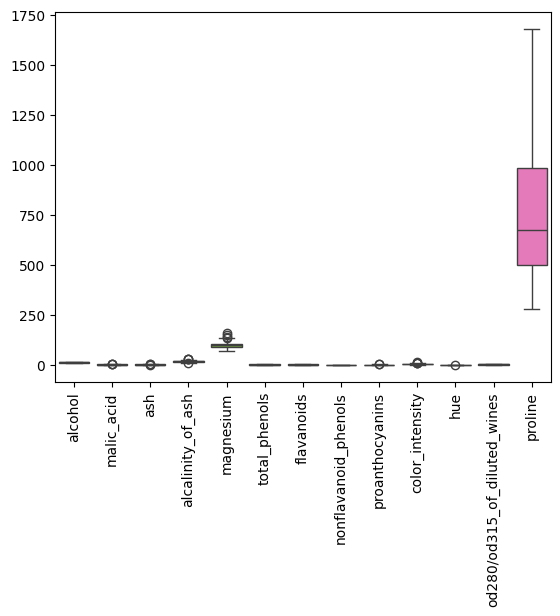

In [5]:
# Exploratory Data Analysis
# Visualize key statistics
## Your code starts here
sns.boxplot(data=df_original)
plt.xticks(rotation=90, fontsize=10)
## Your code ends here

**Question:** What do you see? What is the problem?

**You Answer:** Type your answer here!

Some of the boxes are barely visible because the proline feature values are being used for the y-axis, and they are way larger than the other values



# Data Standardization:
**Coding excersice:** Standardize the original data (i.e., dataframe without considering data quality issues) and use the same boxplot to visualize the standardized data!

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'malic_acid'),
  Text(2, 0, 'ash'),
  Text(3, 0, 'alcalinity_of_ash'),
  Text(4, 0, 'magnesium'),
  Text(5, 0, 'total_phenols'),
  Text(6, 0, 'flavanoids'),
  Text(7, 0, 'nonflavanoid_phenols'),
  Text(8, 0, 'proanthocyanins'),
  Text(9, 0, 'color_intensity'),
  Text(10, 0, 'hue'),
  Text(11, 0, 'od280/od315_of_diluted_wines'),
  Text(12, 0, 'proline')])

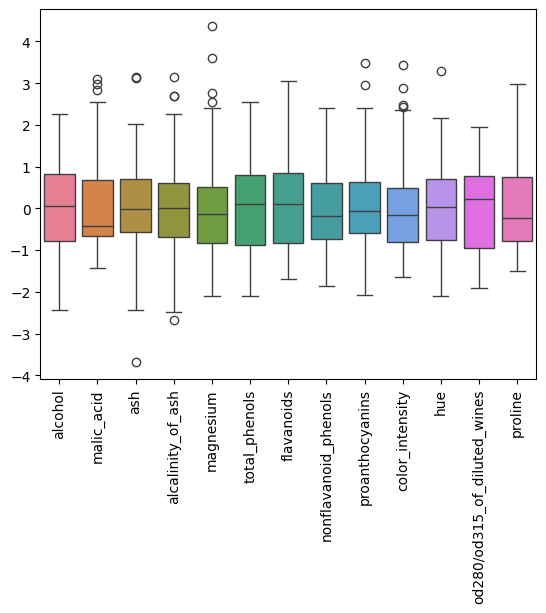

In [6]:
# Standardize the data
## Your code starts here    
scaler = StandardScaler()                             #use the standard scalar to standarize the orignal dataframe to
standardized_data = scaler.fit_transform(df_original) #to get rid of the issue of different magnitudes of values among the different features

""" Put the standardized data back into dataframe"""
df_standardized = pd.DataFrame(standardized_data, columns=df_original.columns)

## Your code ends here

# Exploratory Data Analysis
# Visualize key statistics
## Your code starts here
""" Use boxplot to show visualize the standardized features """
sns.boxplot(data=df_standardized)
plt.xticks(rotation=90, fontsize=10)

## Your code ends here

**Question:** Was the problem resolved?

**You Answer:** Type your answer here!

Yes, everything is more visible now



**Coding excersice:** Calculate correlation matrix and visualize it?

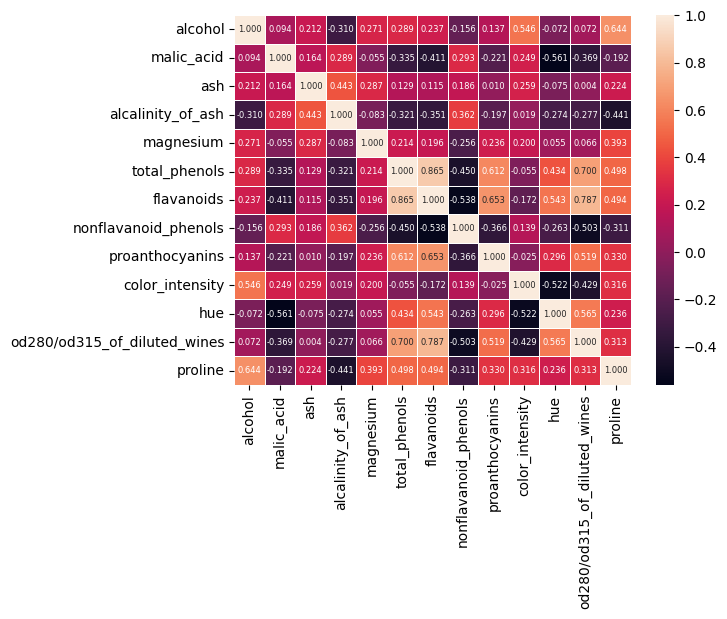

In [7]:
# Calculate correlation matrix
## Your code starts here
corrMatrix = df_standardized.corr()


# Visualize correlation matrix
sns.heatmap(corrMatrix, annot=True, fmt=".3f", linewidths=0.5, annot_kws={"size": 6})
plt.show()

## Your code ends here

What is the intuition behind the correlation matrix?

**Your answer:** Type your answer here!

The correlation shows the linear relationship between the features of the graph. 0 indicates no linear relationship, closer to 1 means a linear positive correlation and -1 means negative linear correlation. In general, this info helps identify and remove highly correlated features



# Dimensionality Reduction with PCA
**Coding excersice:** Apply Dimensionality Reduction using PCA. Find the number of principle components to retain using the "explained_variance_ratio". Use the threshold of **0.95** for the cumulative explained variance ratio in order to find the number of principle components.

**Note:** When performing dimensionality reduction using PCA, one of the main considerations is to select the appropriate number of principal components to retain. The explained variance ratio tells us the proportion of variance explained by each principal component. By summing up the explained variance ratios cumulatively, we can see how much of the total variance in the data is explained as we include more principal components.

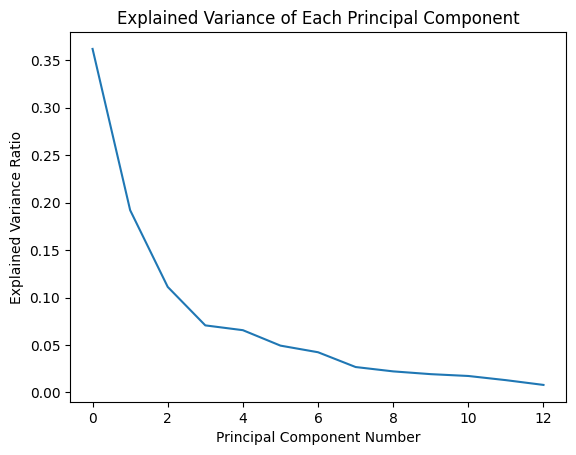

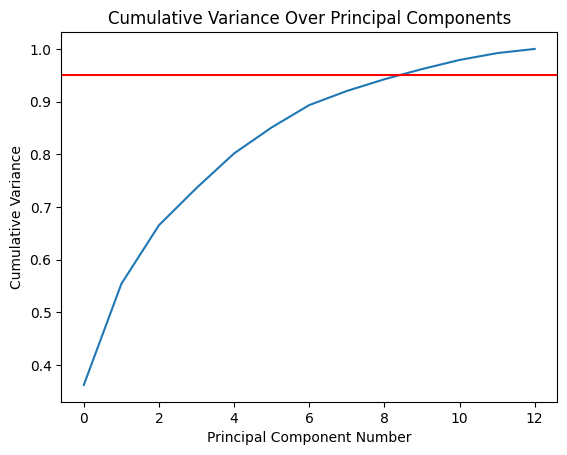

Explained variance ratio of each principal component:
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019]
Summary:
PCA captures 96.16971684450644% of the variance with 10 components.


In [ ]:
# Dimensionality Reduction using PCA
# Apply PCA
## Your code starts here

pca = PCA()                                                    
pca.fit(df_standardized)                                        #find the principal components that maximize variance
explained_variance_ratio = pca.explained_variance_ratio_        #finds what proportion of the variance is explained by each principal component
#print(explained_variance_ratio)
#print(sum(explained_variance_ratio))

## Your code ends here

# Determine the number of principal components to retain
## Your code starts here
cumulative_variance = np.cumsum(explained_variance_ratio)               #finds the cumulative sum of the principal components
retain_components_num = np.argmax(cumulative_variance >= 0.95) + 1      #finds the index where the cum sum >= 0.95, only want to include components to reach this goal
#print(retain_components_num)                                           #need to add 1 bc arrays are 0 indexed, so +1 actual components to retain

## Your code ends here

# Plot explained variance ratio
## Your code starts here
plt.plot(explained_variance_ratio)
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance of Each Principal Component')
plt.show()

plt.plot(cumulative_variance)
plt.xlabel('Principal Component Number')
plt.ylabel('Cumulative Variance')
plt.title('Cumulative Variance Over Principal Components')
plt.axhline(y=0.95, color='r')
plt.show()

## Your code ends here

# Choose the number of components based on the explained variance ratio
## Your code starts here
pca = PCA(n_components=retain_components_num)                           #reintialize so PCA only includes the components we retain

## Your code ends here

# Perform PCA with the chosen number of components
## Your code starts here
pca_data = pca.fit_transform(df_standardized)                           #refit the data, transfrom it to reduced dimension state

## Your code ends here

# Interpretation and Conclusion
# Interpret principal components
print("Explained variance ratio of each principal component:")
## Your code starts here
print(pca.explained_variance_ratio_)
## Your code ends here

# Summarize key findings
print("Summary:")
""" write your code inside the .format()!"""
print(f"PCA captures {cumulative_variance[retain_components_num-1]*100}% of the variance with {retain_components_num} components.")

**Congratulations!** You completed this assignment.


# Submission Guidelines:

* Implement the above steps in a Jupyter Notebook file.
* Save your ipython code and name it as: lastname_firstname_HW1.ipynb (.ipynb extension)
* Include comments and explanations to describe your approach and the rationale behind each step.
* Submit on Canvas.

